In [ ]:
!pip install wordcloud
!pip install psycopg2-binary

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import glob
from pathlib import Path
import os
import sys
import psycopg2

In [58]:
#------------------------------------------------------------------------------------------------------#
def print_psycopg2_exception(err):
    err_type, err_obj, traceback = sys.exc_info()
    line_num = traceback.tb_lineno
    print ("\npsycopg2 ERROR:", err, "on line number:", line_num)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type)
    print ("\nextensions.Diagnostics:", err.diag)
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")
    input("Press Enter to continue...")
#------------------------------------------------------------------------------------------------------#

conn = psycopg2.connect(database="YOUR_DATABASE", user='<YOUR_USER>', password='<YOUR_PASSWORD>', 
                        host='<DATABASE_HOST>', port= '5432')
cursor = conn.cursor()

#------------------------------------------------------------------------------------------------------#
# Read PostgreSQL and get all the processed email keys into a list first

topic_no = "5"
records_in_pgres = []
try:
    cursor.execute("SELECT email_key FROM ml_extract_track WHERE primary_topic = '" + topic_no + "';")
    print(cursor.rowcount, "record(s) found in PostgreSQL", "\n")
    print("Press Enter to continue..")
    rows = cursor.fetchall()
    for row in rows:
        records_in_pgres.append(row[0])

except Exception as err: 
    print_psycopg2_exception(err)
    conn.rollback()

881 record(s) found in PostgreSQL 

Press Enter to continue..


In [ ]:
path = "/root/ml_cleaned_emails_r2/"

#### <font color='blue'> Revised version for specific topic

In [59]:
cnt = 0
out_file_name = ""
email_key = ""

df = pd.DataFrame(columns = ['cleaned_text'])

for out_file_name in records_in_pgres:
    # print(str(cnt) + ") File: " + out_file_name)
    
    for filename in glob.glob(os.path.join(path, out_file_name + "*.txt")):
        with open(os.path.join(os.getcwd(), filename), 'r') as f:
            fileContent = f.read()
            df.loc[cnt] = fileContent
            cnt = cnt + 1
        
            if cnt % 250 == 0: 
                print(str(cnt) + " records read.. ")
                # df = pd.DataFrame([fileContent], columns=['cleaned_text'])
                # print(data)
df.head()

250 records read.. 
500 records read.. 
750 records read.. 


,cleaned_text
0,rds center notification regarding vendor secur...
1,email this is in response to your recent inqui...
2,cvs caremark etf forms thank you for this info...
3,thank you for this information is in process o...
4,fw test email at pm test email at pmthis is te...


In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('thank')
stopwords.add('rds')
stopwords.add('please')

print(stopwords)

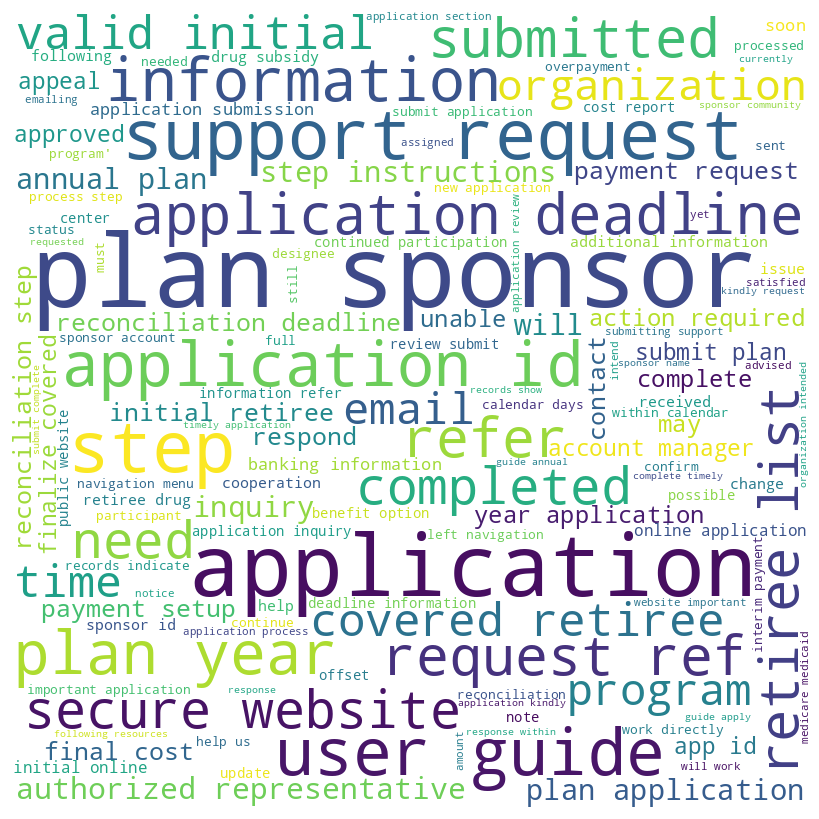

In [60]:
for val in df.values:
    
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
    
    comment_words += " ".join(tokens) + " "
 
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, 
                      min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
wordcloud.to_file("/root/charts/topic_" + topic_no + "_wordcloud.png")